In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


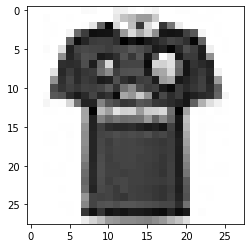

[  0   0   0   0   0   0   0   9   8   0   0  34  29   7   0  11  24   0
   0   3   3   1   0   1   1   0   0   0   0   0   4   0   0   1   0   0
   0   0   0  44  88  99 122 123  80   0   0   0   0   1   1   1   0   0
   0   0   0   0   1   2   0   0   0   3  46 174 249  67   0  94 210  61
  14 212 157  37   0   0   0   0   1   0   0   0   0   0   2   2   0  23
 168 206 242 239 238 214 125  61 113  74 133 236 238 236 203 184  20   0
   1   0   0   0   0   0   1   0   0 175 245 223 207 205 206 216 255 237
 251 232 223 212 200 205 216 249 173   0   0   2   0   0   0   0   7   0
  53 225 201 197 200 201 206 199 197 185 194 204 232 226 249 219 194 205
 229  33   0   1   0   0   0   0   1   0 133 223 208 192 195 233 226 216
 191 210 188 236 186   0  50 234 207 208 231 133   0   0   0   0   0   0
   0   0 216 218 216 194 229 172  64 219 201 200 200 247  68  72  54 165
 237 212 219 226   0   0   0   0   0   0   0  50 221 207 220 211 207 165
 138 205 192 191 190 232 119 113  67 173 237 217 20

In [4]:
# 데이터파일 불러오기
df = pd.read_csv('/gdrive/My Drive/3-2_machine_learning/image-10k.csv', header=None)

X = df.iloc[:, 1:].values     # 데이터샘플
y = df.iloc[:, 0].values      # 타겟레이블

plt.imshow(X[0].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()
print(X[0])
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1, stratify=y)

print(x_train.shape, y_train.shape)

Label:  Coat


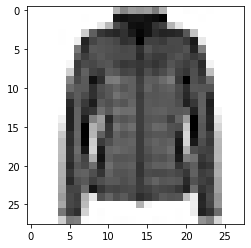

In [ ]:
images = ['T-shirt', 'Trouser', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

# 테스트셋 중에 임의로 하나를 선택
r = random.randint(0, len(x_test) - 1)    
x_single_data = x_test[r:r + 1]
y_single_data = y_test[r:r + 1]

# 선택된 테스트 이미지 레이블 출력
print('Label: ', images[int(y_single_data.item())])

# 선택된 테스트 이미지 출력
plt.imshow(x_single_data.reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
'''   

    
# Random Forest로 학습시키기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')


rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"랜덤 포레스트 정확도 : {acc: .4f}")#랜덤 포레스트 정확도 :  0.8470'''

'   \n\n    \n# Random Forest로 학습시키기\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nimport pandas as pd\nimport numpy as np\nimport warnings\nwarnings.filterwarnings(action=\'ignore\')\n\n\nrf_clf = RandomForestClassifier()\nrf_clf.fit(x_train, y_train)\ny_pred = rf_clf.predict(x_test)\nacc = accuracy_score(y_test, y_pred)\nprint(f"랜덤 포레스트 정확도 : {acc: .4f}")#랜덤 포레스트 정확도 :  0.8470'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='saga',tol=1e-3,C=1e-2 ,max_iter=1e3)

lr.fit(x_train, y_train)    # 훈련하기
pred_y = lr.predict(x_test)
print('lr 분류기 정확도', accuracy_score(y_test, pred_y))# 정확도 평가 0.837

lr 분류기 정확도 0.837


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

logistic = LogisticRegression(solver='saga',max_iter=1e3) # 로지스틱 회귀 모델 생성

tol = reciprocal(1e-2, 1e2)
C = reciprocal(1e-4,1e0) # 규제 하이퍼파라미터 값의 후보를 위한 분포를 만듭니다.
warm_start = [True,False]
hyperparameters = dict(C=C, tol=tol,warm_start=warm_start) # 하이퍼파라미터 옵션을 만듭니다.

# 랜덤 서치 객체 생성
randomizedsearch = RandomizedSearchCV(logistic, 
                                      hyperparameters, 
                                      n_iter=500, 
                                      cv=3, 
                                      verbose=0, 
                                      n_jobs=-1)

best_model = randomizedsearch.fit(x_train, y_train) # 랜덤 서치 수행


In [ ]:
lr=best_model.best_estimator_
print(lr)

lr.fit(x_train, y_train)    # 훈련하기
pred_y = lr.predict(x_test)
print('lr 분류기 정확도', accuracy_score(y_test, pred_y))

LogisticRegression(C=0.7835239369639306, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000.0, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='saga',
                   tol=0.011093739556598911, verbose=0, warm_start=False)
lr 분류기 정확도 0.8396


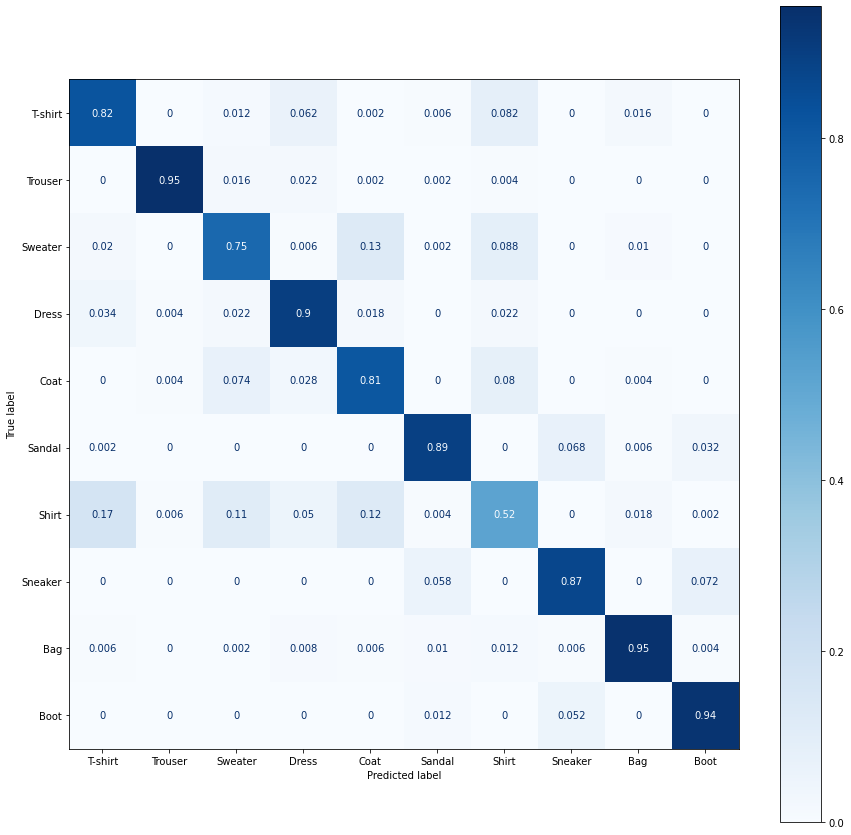

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15] # [width, height] (inches)
# import some data to play with
class_names =  ['T-shirt', 'Trouser', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

plot_confusion_matrix(lr, x_test, y_test,
                          display_labels=class_names,
                          cmap=plt.cm.Blues,
                          normalize='true')

plt.show()